# Estudo de caso

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Primeiro contato Dataset

In [34]:
df_raw = pd.read_csv('../data/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df_raw.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df_raw.shape

(1470, 35)

In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
# Verificação de Dados faltantes

df_raw.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# EDA

In [8]:
np.unique(df_raw.Attrition, return_counts=True)

(array(['No', 'Yes'], dtype=object), array([1233,  237], dtype=int64))

In [9]:
colunas_cat = np.array(df_raw.select_dtypes(include='object').columns)
df_raw.select_dtypes(include='object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [10]:
colunas_num = df_raw.select_dtypes(exclude='object').columns
df_raw.select_dtypes(exclude='object')

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,3,80,1,17,3,3,5,2,0,3
1466,39,613,6,1,1,2062,4,42,2,3,...,1,80,1,9,5,3,7,7,1,7
1467,27,155,4,3,1,2064,2,87,4,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,1023,2,3,1,2065,4,63,2,2,...,4,80,0,17,3,2,9,6,0,8


In [11]:
# Análise de dados numéricos
df_raw[colunas_num].describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'EmployeeCount'}>],
       [<AxesSubplot:title={'center':'EmployeeNumber'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>,
        <AxesSubplot:title={'center':'JobLevel'}>],
       [<AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'MonthlyRate'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>],
       [<AxesSubplot:title={'center':'PerformanceRating'}>,
        <AxesSubplot:title={'center':'RelationshipSatisfaction'}>,
        <AxesSubplot:title={'cen

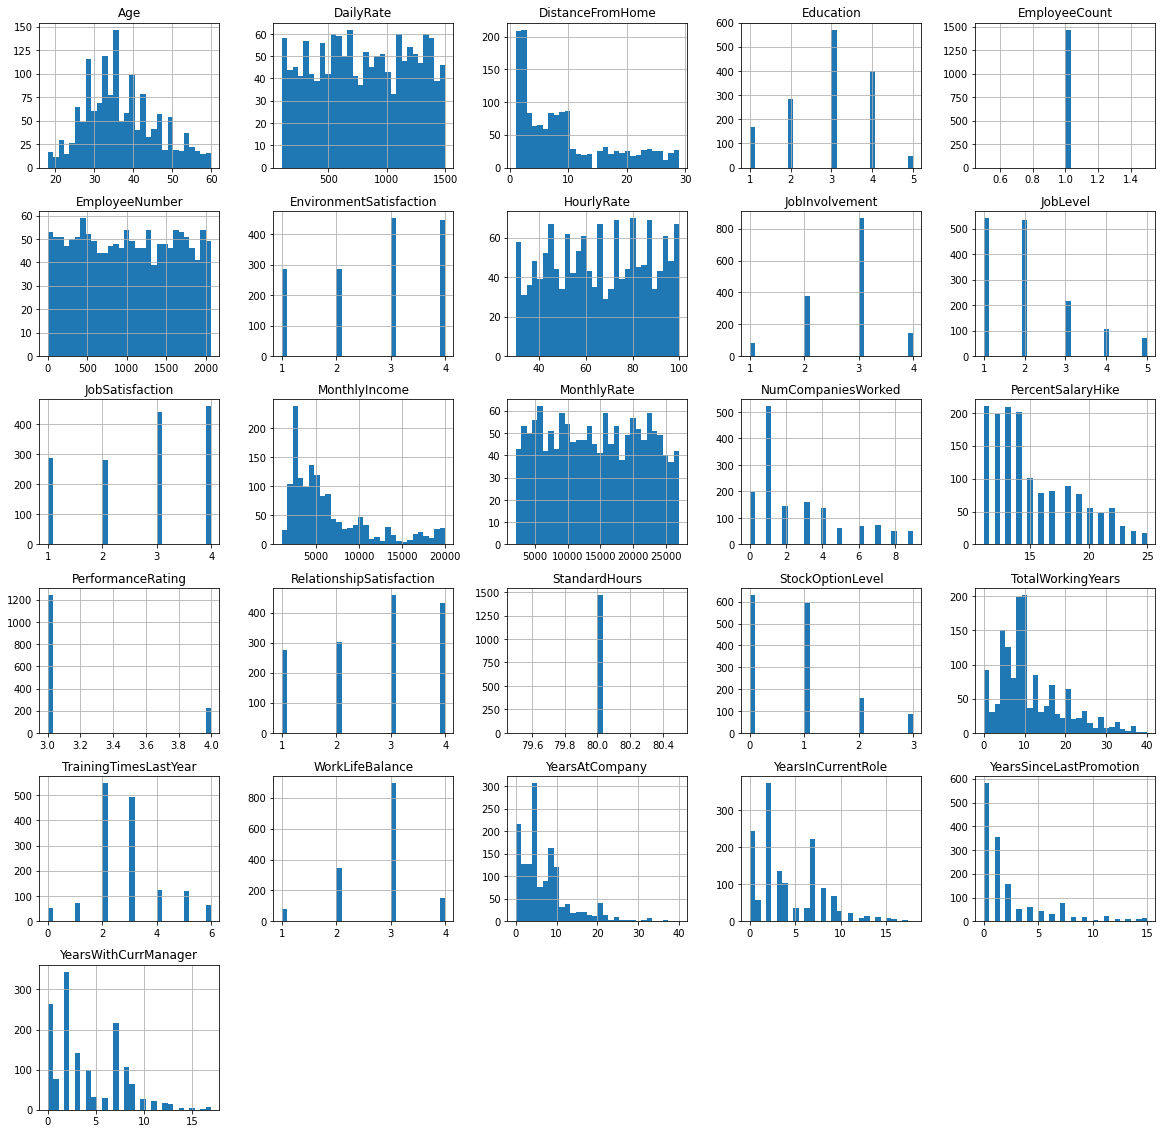

In [12]:
df_raw[colunas_num].hist(bins=30, figsize=(20, 20))

Eliminar: EmployerCount e StandartHours

In [13]:
cat_1 = list()
cat_2 = list()
cat_3 = list()

for i in colunas_num:
    if df_raw[i].max() <10:
        cat_1.append(i)
    elif 10< df_raw[i].max() <200:
        cat_2.append(i)
    else:
        cat_3.append(i)



<AxesSubplot:>

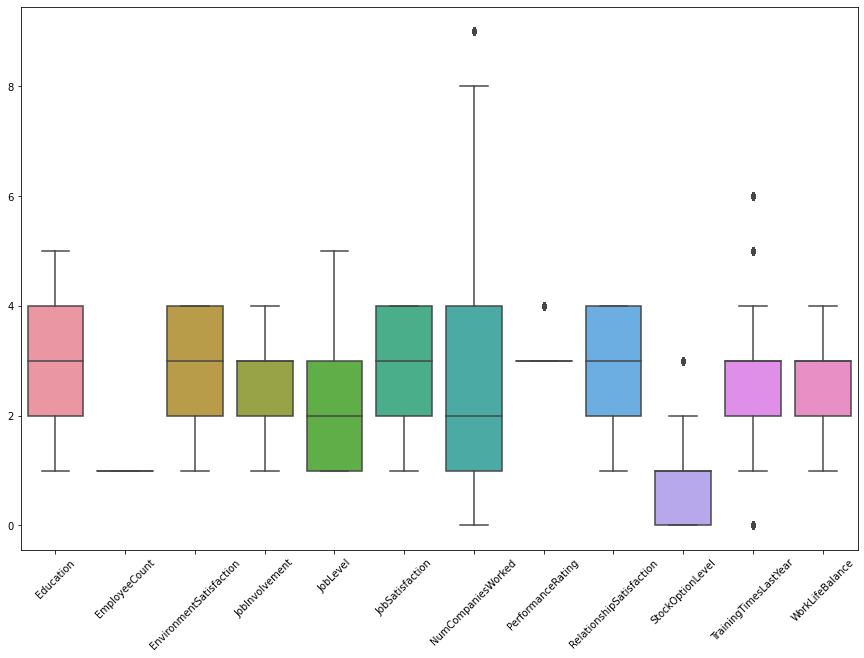

In [14]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
sns.boxplot(data = df_raw[cat_1])



<AxesSubplot:>

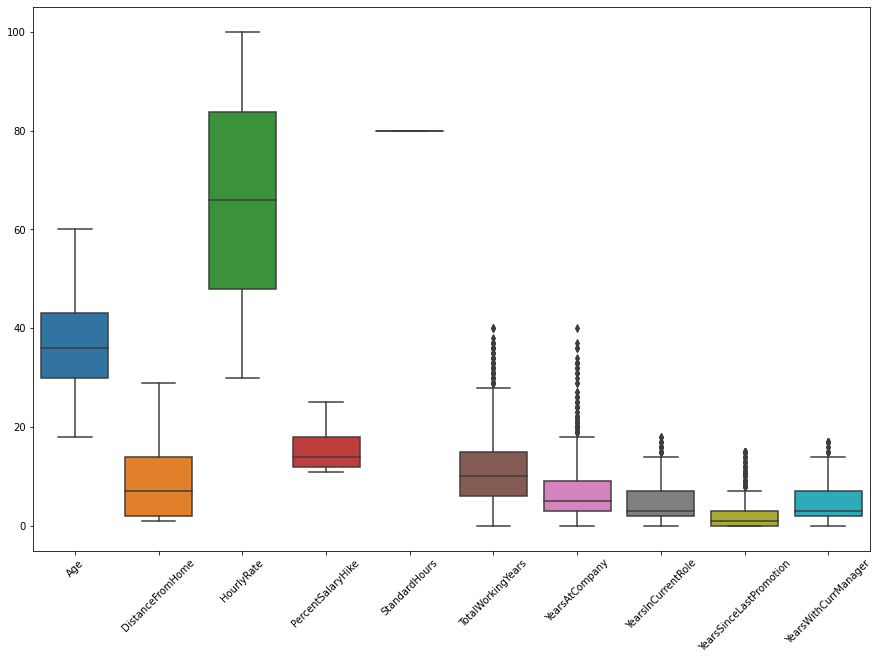

In [15]:

plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
plt.title('')
sns.boxplot(data = df_raw[cat_2])


<AxesSubplot:>

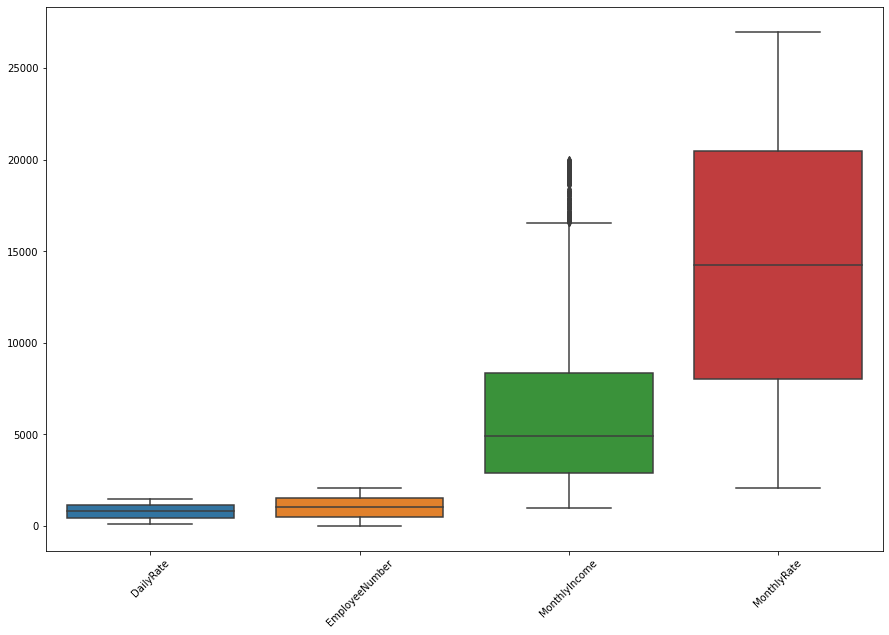

In [16]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
sns.boxplot(data = df_raw[cat_3])

In [17]:
df_raw[colunas_cat].value_counts()

Attrition  BusinessTravel  Department              EducationField    Gender  JobRole                MaritalStatus  Over18  OverTime
No         Travel_Rarely   Research & Development  Life Sciences     Male    Research Scientist     Married        Y       No          19
                                                   Medical           Male    Laboratory Technician  Married        Y       No          17
                           Sales                   Marketing         Male    Sales Executive        Married        Y       No          15
                           Research & Development  Life Sciences     Male    Laboratory Technician  Married        Y       No          15
                                                                             Research Scientist     Single         Y       No          14
                                                                                                                                       ..
                           Human Resourc

In [18]:
def plot_count(col,title=None,xlabel=None, ylabel = None, x_grau=0, figsize = (7,7), hue=None):
    plt.figure(figsize=figsize)
    plt.xlabel('{}'.format(xlabel))
    plt.ylabel('{}'.format(ylabel))
    plt.title('{}'.format(title))
    ax = sns.countplot(x="{}".format(col), hue=hue, data=df_raw)
    plt.xticks(rotation=x_grau)
    plt.show()

    return ax

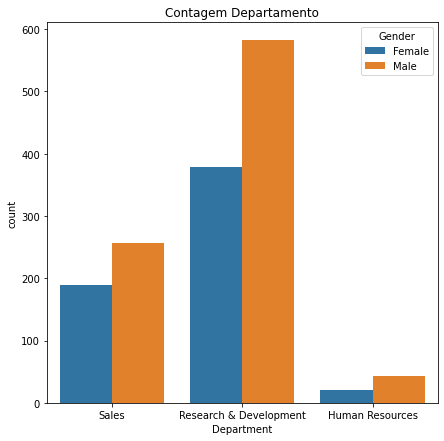

<AxesSubplot:title={'center':'Contagem Departamento'}, xlabel='Department', ylabel='count'>

In [19]:
plot_count('Department', 'Contagem Departamento', hue='Gender')

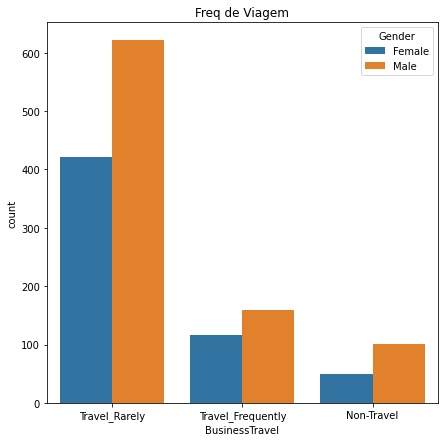

<AxesSubplot:title={'center':'Freq de Viagem'}, xlabel='BusinessTravel', ylabel='count'>

In [20]:
plot_count('BusinessTravel','Freq de Viagem', hue='Gender')

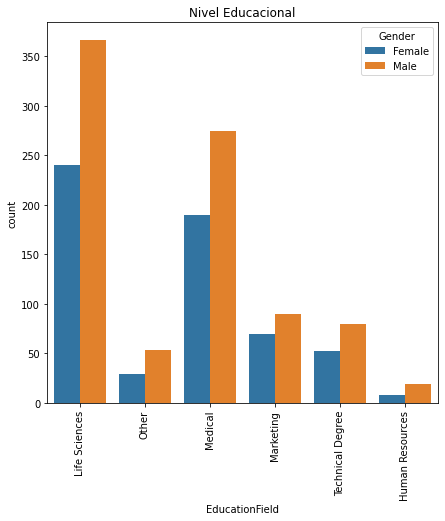

<AxesSubplot:title={'center':'Nivel Educacional'}, xlabel='EducationField', ylabel='count'>

In [21]:
plot_count('EducationField',title='Nivel Educacional', hue='Gender', x_grau=90)

<AxesSubplot:>

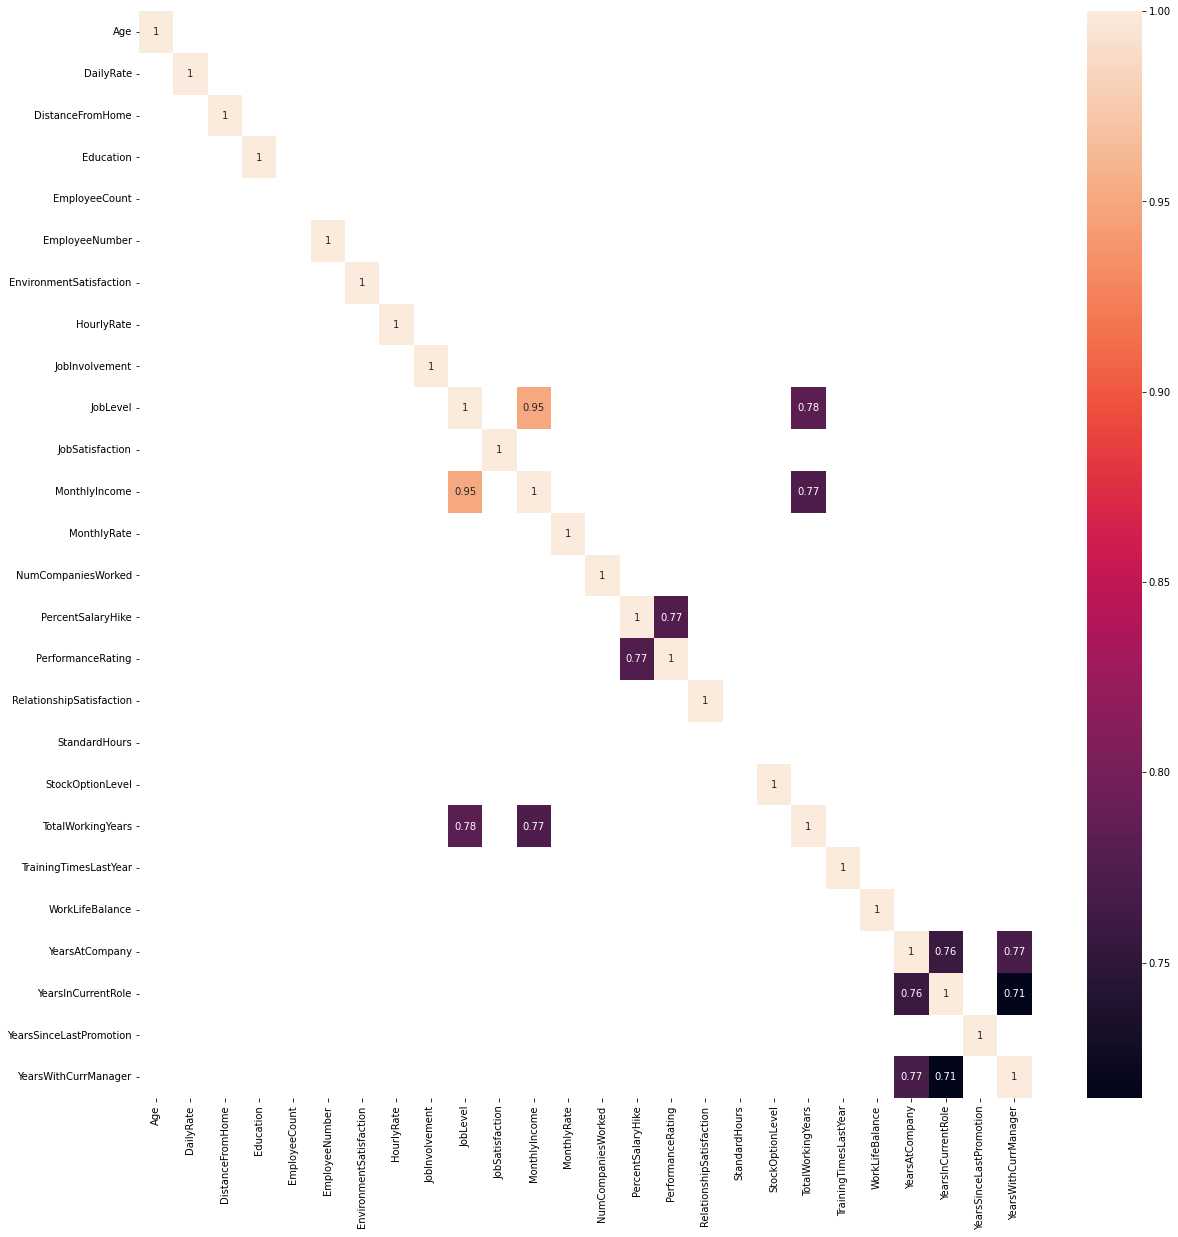

In [22]:
corr = df_raw[colunas_num].corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr[corr>0.70], annot=True)

# Aprendizado de Máquina

Education
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'

EnvironmentSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobInvolvement
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

PerformanceRating
1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'

RelationshipSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

WorkLifeBalance
1 'Bad'
2 'Good'
3 'Better'
4 'Best'

In [23]:
# Transformações nas variáveis string

Education_map = {'Below College':1,
                 'College':2,
                 'Bachelor':3,
                 'Master':4,
                 'Doctor':5}

EnvironmentSatisfaction_map = {'Low':1,
                               'Medium':2,
                               'High':3,
                               'Very High':4}
JobInvolvement_map = {'Low':1,
                      'Medium':2,
                      'High':3,
                      'Very High':4}
JobSatisfaction_map = {'Low':1,
                       'Medium':2,
                       'High':3,
                       'Very High':4}
PerformanceRating_map = {'Low':1,
                         'Good':2,
                         'Excellent':3,
                         'Outstanding':4}

RelationshipSatisfaction_map = {'Low':1,
                                'Medium':2,
                                'High':3,
                                'Very High':4}


In [24]:
colunas_cat_order = ['Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction','WorkLifeBalance']

In [25]:
colunas_cat

array(['Attrition', 'BusinessTravel', 'Department', 'EducationField',
       'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype=object)

# One-Hot e Label Encoder

In [26]:
df = df_raw.copy()

In [42]:
for i in colunas_cat:
    print('A coluna {} possui {} valores distintos: {}'.format(i, len(df[i].unique()),df[i].unique()))

A coluna Attrition possui 2 valores distintos: ['Yes' 'No']
A coluna BusinessTravel possui 3 valores distintos: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
A coluna Department possui 3 valores distintos: ['Sales' 'Research & Development' 'Human Resources']
A coluna EducationField possui 6 valores distintos: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
A coluna Gender possui 2 valores distintos: ['Female' 'Male']
A coluna JobRole possui 9 valores distintos: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
A coluna MaritalStatus possui 3 valores distintos: ['Single' 'Married' 'Divorced']
A coluna Over18 possui 1 valores distintos: ['Y']
A coluna OverTime possui 2 valores distintos: ['Yes' 'No']


Department one Hot

EducationField -> Eliminar

JobRole: one Hot

MaritalStatus: one Hot
Over18 -> Eliminar

In [2]:
colunas_ohe = ['Department', 'JobRole','MaritalStatus']

Attrition = {'Yes':1,
                  'No':0}

BusinessTravel = {'Travel_Rarely':3,
                  'Travel_Frequently':2,
                  'Non-Travel':1}
Gender = {'Female':0, 'Male':1}

OverTime = {'Yes':1, 'No':0}

In [27]:
from sklearn.base import BaseEstimator, TransformerMixin

In [30]:
class MapCategorical(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.columns = ['Attrition','BusinessTravel','Gender', 'OverTime']
        self.dict_map = [{'Yes':1,'No':0},{'Travel_Rarely':3,'Travel_Frequently':2,'Non-Travel':1}, {'Female':0, 'Male':1},{'Yes':1, 'No':0}]

    def fit(self,X):
        return self
    def transform(self, X):
        for col, mapa in zip(self.columns, self.dict_map):
            X['{}'.format(col)] = X['{}'.format(col)].map(mapa)
        return X


In [28]:
df['BusinessTravel'].map({'Travel_Rarely':3,'Travel_Frequently':2,'Non-Travel':1})

0       3
1       2
2       3
3       2
4       3
       ..
1465    2
1466    3
1467    3
1468    2
1469    3
Name: BusinessTravel, Length: 1470, dtype: int64

In [57]:
Attrition = {'Yes':1,
                  'No':0}

BusinessTravel = {'Travel_Rarely':3,
                  'Travel_Frequently':2,
                  'Non-Travel':1}
Gender = {'Female':0, 'Male':1}

OverTime = {'Yes':1, 'No':0}

In [36]:
maps = MapCategorical()


In [40]:
maps.transform(df)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,3,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,2,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,3,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,2,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,3,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,2,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,3,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,3,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,2,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [41]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,3,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,2,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,3,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,2,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,3,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,2,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,3,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,3,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,2,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [27]:
df['Attrition'] = df['Attrition'].map(dict_Attrition)
df['BusinessTravel'] = df['BusinessTravel'].map(BusinessTravel)
df['Gender'] = df['Gender'].map(Gender)
df['OverTime'] = df['OverTime'].map(OverTime)

In [54]:
df_raw

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [28]:
df.drop(labels=['EmployeeCount','EducationField' ,'StandardHours', 'Over18', 'EmployeeNumber'], inplace=True, axis=1)

In [29]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [30]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,3,1102,Sales,1,2,2,0,94,...,3,1,0,8,0,1,6,4,0,5
1,49,0,2,279,Research & Development,8,1,3,1,61,...,4,4,1,10,3,3,10,7,1,7
2,37,1,3,1373,Research & Development,2,2,4,1,92,...,3,2,0,7,3,3,0,0,0,0
3,33,0,2,1392,Research & Development,3,4,4,0,56,...,3,3,0,8,3,3,8,7,3,0
4,27,0,3,591,Research & Development,2,1,1,1,40,...,3,4,1,6,3,3,2,2,2,2


In [31]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [32]:
colunas_num = ['Age', 'DailyRate', 'DistanceFromHome','HourlyRate', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike','TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion']
colunas_ohe = ['Department', 'JobRole','MaritalStatus']
colunas_cat_order = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'PerformanceRating',
                     'RelationshipSatisfaction', 'WorkLifeBalance']

In [33]:
colunas = colunas_num+colunas_ohe+colunas_cat_order
colunas

['Age',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'Department',
 'JobRole',
 'MaritalStatus',
 'Education',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobSatisfaction',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'WorkLifeBalance']

In [34]:
df_ml=df[colunas]

In [35]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [36]:
class MyLabelEnconder(TransformerMixin, BaseEstimator):
    def __init__(self):
        self.encoder = LabelEncoder()
    def fit(self, X):
        self.encoder.fit(X)
        return self
    def transform(self,X):
       return self.encoder.transform(X)

In [37]:
# Transformar variaveis categoricas
transform_num_pip = Pipeline([
    ('scaler', StandardScaler())])

transform_cat_pip = Pipeline([
    ('label_encod',LabelEncoder()),
    ('ohe', OneHotEncoder(sparse=False))
])



full_transform_pip = ColumnTransformer([
    ('num_trans', transform_num_pip, colunas_num),
    #('cat_trans', MyLabelEnconder(),colunas_cat_order),
    ('cat_ohe',OneHotEncoder(sparse=False),colunas_ohe)])

In [38]:
X, y = df_ml,df['Attrition']

In [80]:
from sklearn.model_selection import train_test_split, StratifiedKFold, StratifiedShuffleSplit


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

# Treinamento do Modelo

In [49]:

full_transform_pip.fit(X_train)

ColumnTransformer(transformers=[('num_trans',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Age', 'DailyRate', 'DistanceFromHome',
                                  'HourlyRate', 'MonthlyRate',
                                  'NumCompaniesWorked', 'PercentSalaryHike',
                                  'TrainingTimesLastYear', 'YearsAtCompany',
                                  'YearsInCurrentRole',
                                  'YearsSinceLastPromotion']),
                                ('cat_ohe', OneHotEncoder(sparse=False),
                                 ['Department', 'JobRole', 'MaritalStatus'])])

In [51]:
Xtrain = full_transform_pip.transform(X_train)


In [77]:
from sklearn.metrics import recall_score, accuracy_score, f1_score, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(Xtrain, y_train)
y_pred = knn_clf.predict(Xtrain)
print(accuracy_score(y_train, y_pred))

0.8656462585034014


In [70]:
xtest = full_transform_pip.transform(X_test)
y_pred = knn_clf.predict(xtest)

def avaliacao_modelo(y_true, y_predito):
    print('Accuracy:',accuracy_score(y_true, y_predito))
    print('Recall:',recall_score(y_true, y_predito))
    print('F1:',f1_score(y_true, y_predito))

In [71]:
avaliacao_modelo(y_test, y_pred)

Accuracy: 0.8333333333333334
Recall: 0.0784313725490196
F1: 0.14035087719298245


In [74]:
# Regressao Logistica

lg_reg = LogisticRegression(max_iter=5000)

lg_reg.fit(Xtrain, y_train)
y_pred = lg_reg.predict(xtest)
avaliacao_modelo(y_test, y_pred)

Accuracy: 0.8333333333333334
Recall: 0.0784313725490196
F1: 0.14035087719298245


In [84]:
X_train = full_transform_pip.fit_transform(X)

In [85]:
from sklearn.model_selection import cross_val_score

kfold = StratifiedKFold(n_splits=10)
metrica = make_scorer(f1_score)
lg_reg = LogisticRegression()




cross_val_score(lg_reg,X , y, cv=kfold, scoring='accuracy')

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Vinicius\Documents\DataProjets\ibm-rh\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Vinicius\Documents\DataProjets\ibm-rh\venv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1138, in fit
    X, y = self._validate_data(
  File "C:\Users\Vinicius\Documents\DataProjets\ibm-rh\venv\lib\site-packages\sklearn\base.py", line 596, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Vinicius\Documents\DataProjets\ibm-rh\venv\lib\site-packages\sklearn\utils\validation.py", line 1074, in check_X_y
    X = check_array(
  File "C:\Users\Vinicius\Documents\DataProjets\ibm-rh\venv\lib\site-packages\sklearn\utils\validation.py", line 856, in check_array
    array = np.asarray(array, order=order, dtype=dtype)
  File "C:\Users\Vinicius\Documents\DataProjets\ibm-rh\venv\lib\site-packages\pandas\core\generic.py", line 2064, in __array__
    return np.asarray(self._values, dtype=dtype)
ValueError: could not convert string to float: 'Research & Development'

--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Vinicius\Documents\DataProjets\ibm-rh\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Vinicius\Documents\DataProjets\ibm-rh\venv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1138, in fit
    X, y = self._validate_data(
  File "C:\Users\Vinicius\Documents\DataProjets\ibm-rh\venv\lib\site-packages\sklearn\base.py", line 596, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Vinicius\Documents\DataProjets\ibm-rh\venv\lib\site-packages\sklearn\utils\validation.py", line 1074, in check_X_y
    X = check_array(
  File "C:\Users\Vinicius\Documents\DataProjets\ibm-rh\venv\lib\site-packages\sklearn\utils\validation.py", line 856, in check_array
    array = np.asarray(array, order=order, dtype=dtype)
  File "C:\Users\Vinicius\Documents\DataProjets\ibm-rh\venv\lib\site-packages\pandas\core\generic.py", line 2064, in __array__
    return np.asarray(self._values, dtype=dtype)
ValueError: could not convert string to float: 'Sales'


In [1]:
from fastapi import APIRouter, Request
from pydantic import BaseModel
from services.predict_rh import PredictRH

import json


router = APIRouter(prefix='/ibm', responses={404: {'descriptios': 'not found'}})


class RequestBodyData(BaseModel):
    Age: int
    BusinessTravel: str
    DailyRate: int
    Department: str
    DistanceFromHome: int
    Education: int
    EducationField: str
    EnvironmentSatisfaction: int
    Gender: str
    HourlyRate: int
    JobInvolvement: int
    JobLevel: int
    JobRole: str
    JobSatisfaction: int
    MaritalStatus: str
    MonthlyIncome: int
    MonthlyRate: int
    NumCompaniesWorked: int
    OverTime: str
    PercentSalaryHike: int
    PerformanceRating: int
    RelationshipSatisfaction: int
    StockOptionLevel: int
    TotalWorkingYears: int
    TrainingTimesLastYear: int
    WorkLifeBalance: int
    YearsAtCompany: int
    YearsInCurrentRole: int
    YearsSinceLastPromotion: int
    YearsWithCurrManager: int




async def predict(request: RequestBodyData):
    result = PredictRH().predict(request.json())
    return result


In [2]:
j = {
  "Age":37,
  "BusinessTravel":"Travel_Rarely",
  "DailyRate":1239,
  "Department":"Human Resources",
  "DistanceFromHome":8,
  "Education":2,
  "EducationField":"Other",
  "EnvironmentSatisfaction":3,
  "Gender":"Male",
  "HourlyRate":89,
  "JobInvolvement":3,
  "JobLevel":2,
  "JobRole":"Human Resources",
  "JobSatisfaction":2,
  "MaritalStatus":"Divorced",
  "MonthlyIncome":4071,
  "MonthlyRate":12832,
  "NumCompaniesWorked":2,
  "OverTime":"No",
  "PercentSalaryHike":13,
  "PerformanceRating":3,
  "RelationshipSatisfaction":3,
  "StockOptionLevel":0,
  "TotalWorkingYears":19,
  "TrainingTimesLastYear":4,
  "WorkLifeBalance":2,
  "YearsAtCompany":10,
  "YearsInCurrentRole":0,
  "YearsSinceLastPromotion":4,
  "YearsWithCurrManager":7
}

In [4]:
print(predict(j))

<coroutine object predict at 0x000001F726715640>


In [5]:
from services.predict_rh import PredictRH

import json

In [13]:
import pandas as pd


In [17]:
pd.DataFrame(columns=dict(j).keys(),data=[dict(j).values()])

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,37,Travel_Rarely,1239,Human Resources,8,2,Other,3,Male,89,...,3,3,0,19,4,2,10,0,4,7


In [16]:
dict(j).values()

dict_values([37, 'Travel_Rarely', 1239, 'Human Resources', 8, 2, 'Other', 3, 'Male', 89, 3, 2, 'Human Resources', 2, 'Divorced', 4071, 12832, 2, 'No', 13, 3, 3, 0, 19, 4, 2, 10, 0, 4, 7])

In [18]:
pd.read_json(j)

ValueError: Invalid file path or buffer object type: <class 'dict'>

In [2]:
import requests
import pandas

from services.predict_rh import PredictRH

In [15]:
dados = {
  "Age":22,
  "BusinessTravel":"Travel_Rarely",
  "DailyRate":100,
  "Department":"Human Resources",
  "DistanceFromHome":30,
  "Education":1,
  "EducationField":"Other",
  "EnvironmentSatisfaction":3,
  "Gender":"Male",
  "HourlyRate":89,
  "JobInvolvement":3,
  "JobLevel":2,
  "JobRole":"Human Resources",
  "JobSatisfaction":1,
  "MaritalStatus":"Divorced",
  "MonthlyIncome":4071,
  "MonthlyRate":12832,
  "NumCompaniesWorked":2,
  "OverTime":"No",
  "PercentSalaryHike":13,
  "PerformanceRating":3,
  "RelationshipSatisfaction":3,
  "StockOptionLevel":0,
  "TotalWorkingYears":19,
  "TrainingTimesLastYear":4,
  "WorkLifeBalance":2,
  "YearsAtCompany":10,
  "YearsInCurrentRole":0,
  "YearsSinceLastPromotion":4,
  "YearsWithCurrManager":7
}

In [5]:
url = 'http://127.0.0.1:5000/account'

In [6]:
response = requests.post(url=url, json=dados )

In [7]:
response.content

b'{\n  "Age": 37,\n  "BusinessTravel": "Travel_Rarely",\n  "DailyRate": 1239,\n  "Department": "Human Resources",\n  "DistanceFromHome": 8,\n  "Education": 2,\n  "EducationField": "Other",\n  "EnvironmentSatisfaction": 3,\n  "Gender": "Male",\n  "HourlyRate": 89,\n  "JobInvolvement": 3,\n  "JobLevel": 2,\n  "JobRole": "Human Resources",\n  "JobSatisfaction": 2,\n  "MaritalStatus": "Divorced",\n  "MonthlyIncome": 4071,\n  "MonthlyRate": 12832,\n  "NumCompaniesWorked": 2,\n  "OverTime": "No",\n  "PercentSalaryHike": 13,\n  "PerformanceRating": 3,\n  "RelationshipSatisfaction": 3,\n  "StockOptionLevel": 0,\n  "TotalWorkingYears": 19,\n  "TrainingTimesLastYear": 4,\n  "WorkLifeBalance": 2,\n  "YearsAtCompany": 10,\n  "YearsInCurrentRole": 0,\n  "YearsSinceLastPromotion": 4,\n  "YearsWithCurrManager": 7\n}\n'

In [4]:
trans = PredictRH()


In [16]:
trans.teste(dados)

{'Age': 22,
 'BusinessTravel': 'Travel_Rarely',
 'DailyRate': 100,
 'Department': 'Human Resources',
 'DistanceFromHome': 30,
 'Education': 1,
 'EducationField': 'Other',
 'EnvironmentSatisfaction': 3,
 'Gender': 'Male',
 'HourlyRate': 89,
 'JobInvolvement': 3,
 'JobLevel': 2,
 'JobRole': 'Human Resources',
 'JobSatisfaction': 1,
 'MaritalStatus': 'Divorced',
 'MonthlyIncome': 4071,
 'MonthlyRate': 12832,
 'NumCompaniesWorked': 2,
 'OverTime': 'No',
 'PercentSalaryHike': 13,
 'PerformanceRating': 3,
 'RelationshipSatisfaction': 3,
 'StockOptionLevel': 0,
 'TotalWorkingYears': 19,
 'TrainingTimesLastYear': 4,
 'WorkLifeBalance': 2,
 'YearsAtCompany': 10,
 'YearsInCurrentRole': 0,
 'YearsSinceLastPromotion': 4,
 'YearsWithCurrManager': 7}

In [20]:
trans.predict([dados])

0

In [ ]:
32,Yes,Travel_Rarely,414,Sales,2,4,Marketing,1,1862,...,3,80,0,7,3,2,2,2,2,2

In [23]:
dados = {
  "Age":32,
  "BusinessTravel":"Travel_Rarely",
  "DailyRate":414,
  "Department":"Sales",
  "DistanceFromHome":60,
  "Education":2,
  "EducationField":"Other",
  "EnvironmentSatisfaction":3,
  "Gender":"Male",
  "HourlyRate":89,
  "JobInvolvement":3,
  "JobLevel":2,
  "JobRole":"Human Resources",
  "JobSatisfaction":2,
  "MaritalStatus":"Divorced",
  "MonthlyIncome":4071,
  "MonthlyRate":12832,
  "NumCompaniesWorked":2,
  "OverTime":"No",
  "PercentSalaryHike":13,
  "PerformanceRating":3,
  "RelationshipSatisfaction":3,
  "StockOptionLevel":0,
  "TotalWorkingYears":19,
  "TrainingTimesLastYear":4,
  "WorkLifeBalance":2,
  "YearsAtCompany":2,
  "YearsInCurrentRole":2,
  "YearsSinceLastPromotion":2,
  "YearsWithCurrManager":2
}

In [24]:
trans.predict([dados])

1